In [628]:
import pandas as pd 

In [629]:
# A function to convert our some datasets to desired form.
def converter(data, name):
    df = pd.DataFrame(columns=[name])
    for year, row in data.iterrows():
        i = 1
        for column in data:
            df.loc[str(year) +'-'+ str(i)] = row[column]
            i += 1
    return df    

In [630]:
# Get rid of unnecessary rows and columns
tge_ege_init = pd.read_excel('tge_ege.xls',skiprows=2,skip_footer=12,usecols=range(17))
tge_ege_init.head()

,Unnamed: 0,Unnamed: 1,Ekonomik güven endeksi Economic confidence index,Tüketici güven endeksi(1) Consumer confidence index(1),Hanenin maddi durum beklentisi (gelecek 12 aylık dönemde)(2) Financial situation expectation of household (over the next 12 months)(2),Genel ekonomik durum beklentisi (gelecek 12 aylık dönemde)(2) General economic situation expectation (over the next 12 months)(2),İşsiz sayısı beklentisi (gelecek 12 aylık dönemde)(2) Number of people unemployed expectation (over the next 12 months)(2),Tasarruf etme ihtimali (gelecek 12 aylık dönemde)(2) The probability of saving (over the next 12 months)(2),Reel kesim güven endeksi Real sector confidence index,Toplam sipariş miktarı (mevcut durum) Total amount of orders (current situation),Mamul mal stok miktarı (mevcut durum) Amount of stocks of finished goods (current situation),Üretim hacmi (gelecek 3 ay) Volume of output (next 3 months),Toplam istihdam (gelecek 3 ay) Total employment (next 3 months),Toplam sipariş miktarı (son 3 ay) Total amount of orders (past 3 months),İhracat sipariş miktarı (gelecek 3 ay) Export orders (next 3 months),Sabit sermaye yatırım harcaması Fixed investment expenditure,Genel gidişat General business situation
0,2007.0,1,112.584649,78.581836,95.221211,107.062547,85.754636,26.288951,117.0,93.4,92.7,138.80000,119.3,127.7,132.70000,121.1,110.3
1,NaN,2,110.006476,79.520586,95.917975,108.741564,86.492048,26.930758,113.3,91.4,85.0,137.10001,117.9,117.5,125.00000,119.2,113.4
2,NaN,3,110.288306,79.219967,95.763874,108.290154,85.786898,27.038945,113.7,91.4,86.4,139.39999,115.0,120.8,127.20000,122.4,106.7
3,NaN,4,111.547927,80.440610,96.580513,110.325430,87.076900,27.779599,115.9,97.0,80.5,132.89999,112.7,128.3,131.60001,126.6,117.2
4,NaN,5,106.051276,81.732518,97.394086,112.415743,88.563887,28.556357,106.8,94.6,79.1,127.60000,111.0,116.7,106.50000,121.8,96.8


In [631]:
# Change the name of some columns to use later
tge_ege_init.rename(columns={'Unnamed: 0': 'Yıl',
                             'Unnamed: 1': 'Ay',
                             'Ekonomik\ngüven\nendeksi\nEconomic\nconfidence\nindex':'Ekonomik Güven Endeksi',
                            'İşsiz sayısı\nbeklentisi \n(gelecek\n12 aylık\ndönemde)(2)\nNumber of \npeople \nunemployed\nexpectation \n(over the next\n12 months)(2)':'İşsiz Sayısı',
                            'Toplam\nistihdam\n(gelecek 3 ay)\nTotal \nemployment\n(next 3 months)':'Toplam İstihdam',
                            'Hanenin\nmaddi\ndurum beklentisi\n(gelecek 12 aylık \ndönemde)(2) \nFinancial\nsituation\nexpectation\nof household \n(over the next\n12 months)(2) ':'Hanenin Maddi Gücü'}, inplace=True)
#list(tge_ege)

In [632]:
# Some process to obtain desired index to merge with other datasets
tge_ege_init.fillna(-1,inplace=True)
tge_ege_init['Yıl'] = tge_ege_init['Yıl'].astype(int).astype('str')
for index, row in tge_ege_init.iterrows():
    val = row['Yıl']
    if val == '-1':
        tge_ege_init.at[index, 'Yıl'] =  str(int(year)) +'-'+ str(int(row['Ay']))
    else:
        year=row['Yıl']
        tge_ege_init.at[index, 'Yıl'] =  str(int(year)) +'-'+ str(int(row['Ay']))
        
tge_ege_init.head()

,Yıl,Ay,Ekonomik Güven Endeksi,Tüketici güven endeksi(1) Consumer confidence index(1),Hanenin Maddi Gücü,Genel ekonomik durum beklentisi (gelecek 12 aylık dönemde)(2) General economic situation expectation (over the next 12 months)(2),İşsiz Sayısı,Tasarruf etme ihtimali (gelecek 12 aylık dönemde)(2) The probability of saving (over the next 12 months)(2),Reel kesim güven endeksi Real sector confidence index,Toplam sipariş miktarı (mevcut durum) Total amount of orders (current situation),Mamul mal stok miktarı (mevcut durum) Amount of stocks of finished goods (current situation),Üretim hacmi (gelecek 3 ay) Volume of output (next 3 months),Toplam İstihdam,Toplam sipariş miktarı (son 3 ay) Total amount of orders (past 3 months),İhracat sipariş miktarı (gelecek 3 ay) Export orders (next 3 months),Sabit sermaye yatırım harcaması Fixed investment expenditure,Genel gidişat General business situation
0,2007-1,1,112.584649,78.581836,95.221211,107.062547,85.754636,26.288951,117.0,93.4,92.7,138.80000,119.3,127.7,132.70000,121.1,110.3
1,2007-2,2,110.006476,79.520586,95.917975,108.741564,86.492048,26.930758,113.3,91.4,85.0,137.10001,117.9,117.5,125.00000,119.2,113.4
2,2007-3,3,110.288306,79.219967,95.763874,108.290154,85.786898,27.038945,113.7,91.4,86.4,139.39999,115.0,120.8,127.20000,122.4,106.7
3,2007-4,4,111.547927,80.440610,96.580513,110.325430,87.076900,27.779599,115.9,97.0,80.5,132.89999,112.7,128.3,131.60001,126.6,117.2
4,2007-5,5,106.051276,81.732518,97.394086,112.415743,88.563887,28.556357,106.8,94.6,79.1,127.60000,111.0,116.7,106.50000,121.8,96.8


In [633]:
# Drop unnecessary data
tge_ege = tge_ege_init.set_index('Yıl')
tge_ege.index.name = 'Zaman'
tge_ege.drop(tge_ege.columns[[0,2,3,4,6,7,8,9,10,12,13,14,15]], axis=1,inplace=True)
tge_ege.head()

,Ekonomik Güven Endeksi,İşsiz Sayısı,Toplam İstihdam
Zaman,,,
2007-1,112.584649,85.754636,119.3
2007-2,110.006476,86.492048,117.9
2007-3,110.288306,85.786898,115.0
2007-4,111.547927,87.076900,112.7
2007-5,106.051276,88.563887,111.0


In [634]:
tufe_init = pd.read_excel('tfe.xls')
tufe_init

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
2010,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.90,179.07,182.35,182.40,181.85
2011,182.60,183.93,184.70,186.30,190.81,188.08,187.31,188.67,190.09,196.31,199.70,200.85
2012,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
2013,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01
2014,233.54,234.54,237.18,240.37,241.32,242.07,243.17,243.40,243.74,248.37,248.82,247.72
2015,250.45,252.24,255.23,259.39,260.85,259.51,259.74,260.78,263.11,267.20,268.98,269.54
2016,274.44,274.38,274.27,276.42,278.02,279.33,282.58,281.76,282.27,286.33,287.81,292.54


In [635]:
tufe = converter(tufe_init,'Tüketici Fiyat Endeksi')
tufe.head()

,Tüketici Fiyat Endeksi
2007-1,135.84
2007-2,136.42
2007-3,137.67
2007-4,139.33
2007-5,140.03


In [636]:
ois_init = pd.read_excel('ois.xls')
ois_init.head()

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,-0.58,0.66,0.99,1.27,1.33,0.49,-0.63,0.01,1.10,2.08,1.19,0.11
2008,0.15,1.46,0.96,1.70,1.62,-0.73,-0.32,-0.37,0.52,2.45,0.77,0.00
2009,0.23,-0.26,1.32,0.28,1.13,-0.15,0.33,-0.69,0.35,2.38,1.26,0.51
2010,1.52,1.59,0.59,0.70,-0.43,-0.68,-0.59,0.49,1.36,2.11,-0.13,-0.80
2011,0.30,0.88,0.26,0.92,2.69,-1.66,-0.52,0.62,0.75,3.21,2.06,0.58


In [637]:
ois = converter(ois_init,'OİS')
ois.head()

,OİS
2007-1,-0.58
2007-2,0.66
2007-3,0.99
2007-4,1.27
2007-5,1.33


In [638]:
ufe_init = pd.read_excel('ufe.xls')
ufe_init.head()

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,-0.05,0.95,0.97,9.68,0.39,-0.24,0.06,0.02,1.03,1.81,1.95,0.22
2008,0.42,2.56,3.17,4.50,2.12,0.32,1.25,-2.34,-0.90,0.57,0.03,-3.54
2009,0.23,1.17,0.29,0.65,-0.05,0.94,-0.71,0.42,0.62,0.28,1.29,0.66
2010,0.58,1.66,1.94,2.35,-1.15,-0.50,-0.16,1.15,0.51,1.21,0.31,1.31
2011,2.36,1.72,1.22,0.61,0.15,0.01,-0.03,1.76,1.55,1.60,0.65,1.00


In [639]:
ufe = converter(ufe_init,'Üretici Fiyat Endeksi')
ufe.head()

,Üretici Fiyat Endeksi
2007-1,-0.05
2007-2,0.95
2007-3,0.97
2007-4,9.68
2007-5,0.39


In [640]:
tge_init= pd.read_excel('tge.xls')
tge_init.head()

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,78.581836,79.520586,79.219967,80.440610,81.732518,80.949646,82.270596,85.024409,83.885017,82.975294,79.297517,80.666743
2008,78.892660,74.376834,68.739040,63.013179,62.138995,61.791560,63.786432,66.626884,67.497974,61.017036,55.657354,56.676348
2009,58.334549,60.783764,61.550822,67.531254,70.053371,72.046072,69.145565,68.079112,68.701343,67.236810,65.155241,65.567809
2010,66.013158,68.626109,71.519006,72.573485,73.357630,74.815107,74.254487,74.128791,77.184919,75.794565,78.115084,77.765970
2011,78.062666,80.340164,80.177315,80.235176,79.628224,83.193337,81.611040,78.521325,80.473879,76.505506,77.817545,78.820463


In [641]:
tge = converter(tge_init,'Tüketici Güven Endeksi')
tge.head()

,Tüketici Güven Endeksi
2007-1,78.581836
2007-2,79.520586
2007-3,79.219967
2007-4,80.440610
2007-5,81.732518


In [642]:
# Merge our datasets
#merged = pd.merge(pd.merge(tge,ege,left_index=True, right_index=True),tufe,left_index=True, right_index=True)
merged = tge_ege.merge(tufe, left_index=True, right_index=True).merge(ufe, left_index=True, right_index=True).merge(ois, left_index=True, right_index=True).merge(tge, left_index=True, right_index=True)
merged.head()

,Ekonomik Güven Endeksi,İşsiz Sayısı,Toplam İstihdam,Tüketici Fiyat Endeksi,Üretici Fiyat Endeksi,OİS,Tüketici Güven Endeksi
Zaman,,,,,,,
2007-1,112.584649,85.754636,119.3,135.84,-0.05,-0.58,78.581836
2007-2,110.006476,86.492048,117.9,136.42,0.95,0.66,79.520586
2007-3,110.288306,85.786898,115.0,137.67,0.97,0.99,79.219967
2007-4,111.547927,87.076900,112.7,139.33,9.68,1.27,80.440610
2007-5,106.051276,88.563887,111.0,140.03,0.39,1.33,81.732518


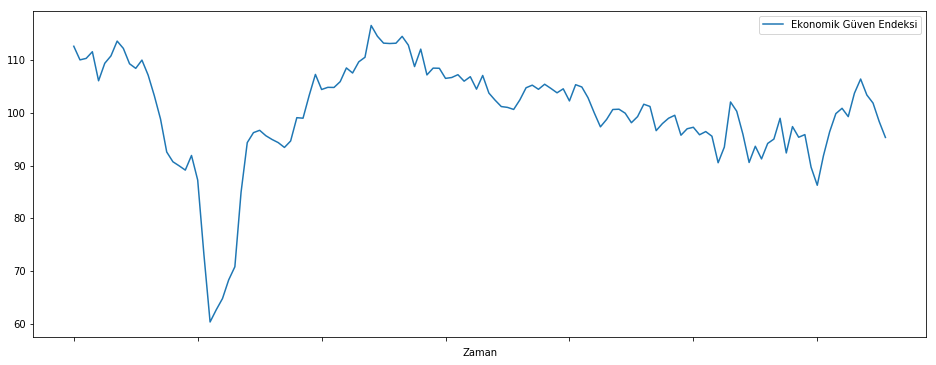

In [643]:
import matplotlib.pyplot as plt
%matplotlib inline

# ege
merged.plot(y="Ekonomik Güven Endeksi", kind='line', figsize=[16,6])

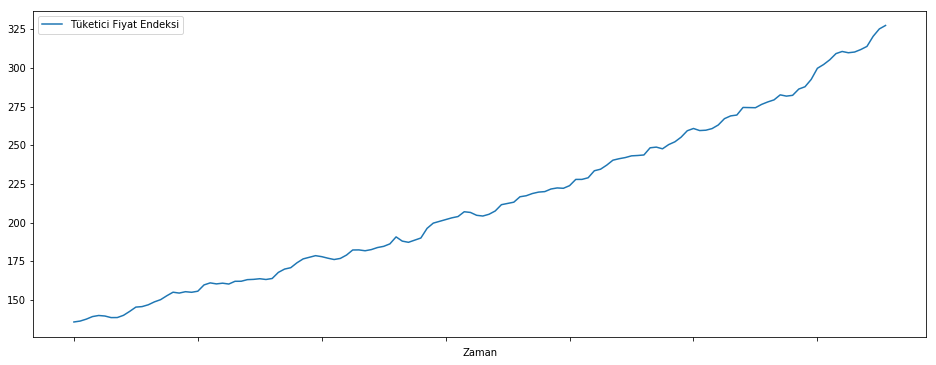

In [644]:
#tufe
merged.plot(y="Tüketici Fiyat Endeksi", kind='line', figsize=[16,6])

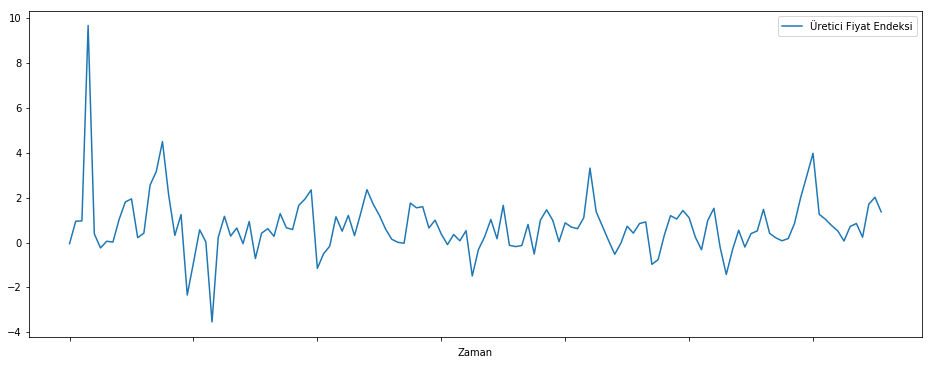

In [645]:
#ufe
merged.plot(y="Üretici Fiyat Endeksi", kind='line', figsize=[16,6])

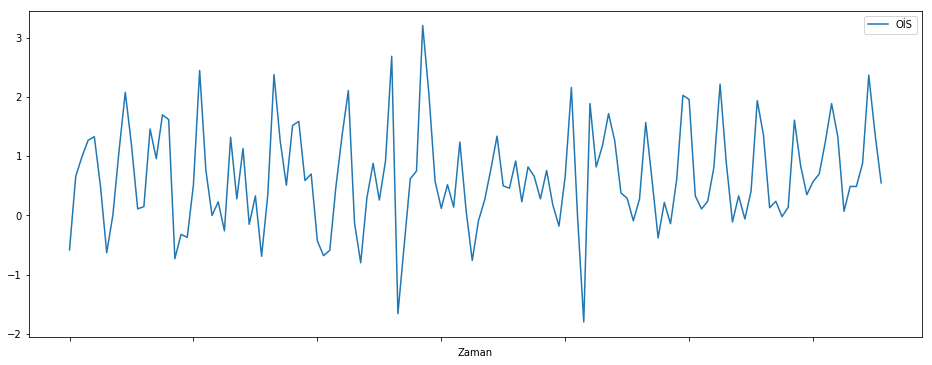

In [646]:
#ois
merged.plot(y="OİS", kind='line', figsize=[16,6])

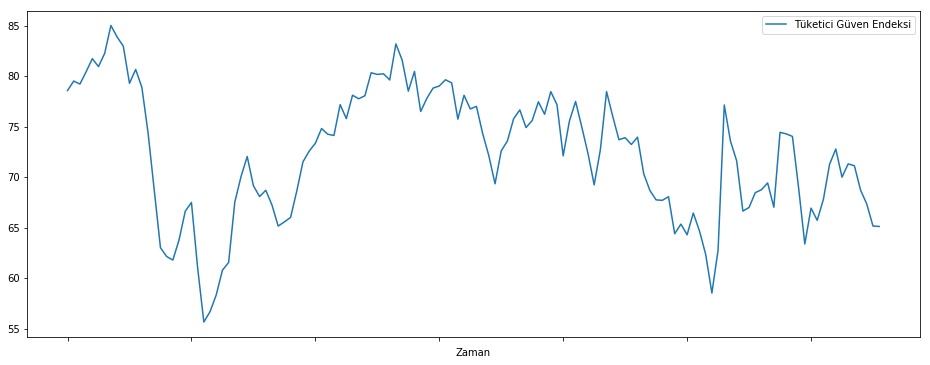

In [647]:
#y = tge
merged.plot(y="Tüketici Güven Endeksi", kind='line', figsize=[16,6])

In [648]:
from sklearn.model_selection import train_test_split
x = merged.iloc[:,0:6].values
y = merged.iloc[:,6].values
print(x.shape, y.shape)

(132, 6) (132,)


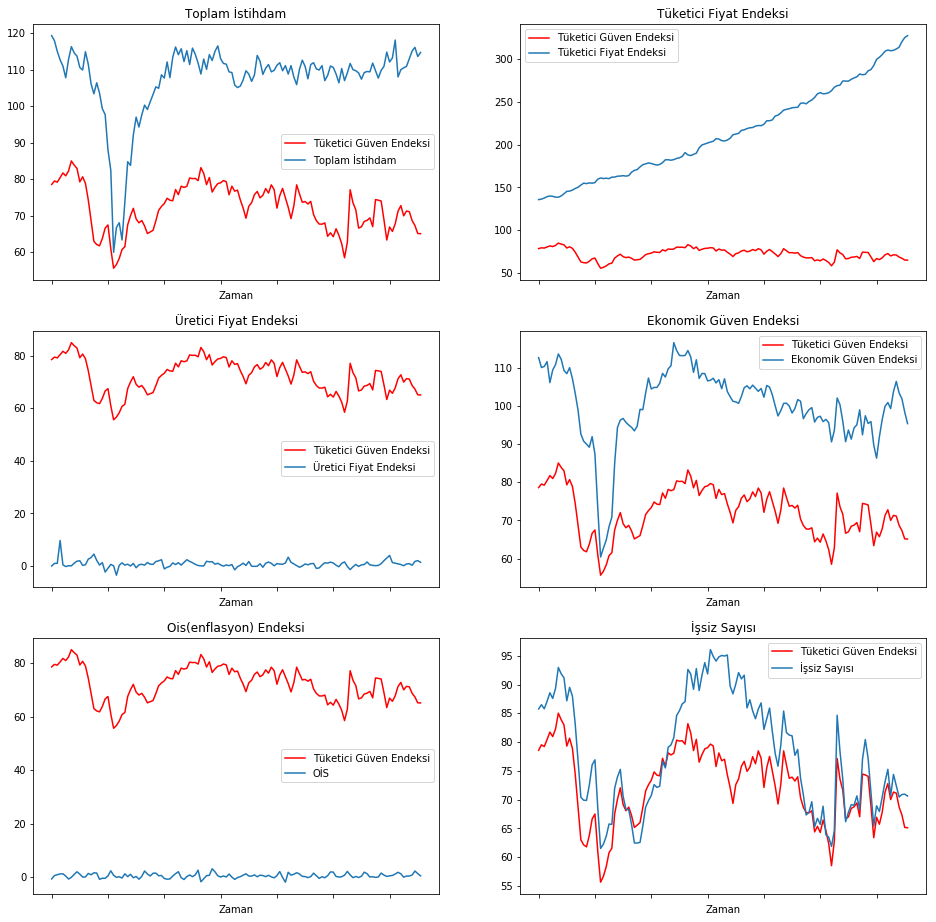

In [649]:
# Relationship between Tüketici Güven Endeksi and each factor
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
axes = axes.ravel()
merged.plot(y="Tüketici Güven Endeksi",ax=axes[0],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Güven Endeksi",ax=axes[1],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Güven Endeksi",ax=axes[2],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Güven Endeksi",ax=axes[3],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Güven Endeksi",ax=axes[4],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Güven Endeksi",ax=axes[5],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Fiyat Endeksi",ax=axes[1],title='Tüketici Fiyat Endeksi', kind='line')
merged.plot(y="Üretici Fiyat Endeksi",ax=axes[2],title='Üretici Fiyat Endeksi', kind='line') 
merged.plot(y="Ekonomik Güven Endeksi",ax=axes[3],title='Ekonomik Güven Endeksi', kind='line')
merged.plot(y="OİS",ax=axes[4],title='Ois(enflasyon) Endeksi',kind='line')
merged.plot(y="Toplam İstihdam",ax=axes[0],title='Toplam İstihdam',kind='line')
merged.plot(y="İşsiz Sayısı",ax=axes[5],title='İşsiz Sayısı',kind='line')

# Validating with splitting

In [650]:
#create an instance of a simple regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Train the model using the training data that we created
model.fit(x_train, y_train)
print('Intercept: \n',model.intercept_)
print('Coefficients: \n', model.coef_)

# MODEL TESTING: make predictions based on the test values of x
y_pred = model.predict(x_test)
confidence = model.score(x_test,y_test)
print(confidence)

# MODEL PERFORMANCE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Intercept: 
 16.145216672131156
Coefficients: 
 [ 0.41873146  0.29872739 -0.08184685 -0.00109135 -0.06468581 -0.15387977]
0.9176995108352138
Mean squared error: 4.70
Variance score: 0.92


# 10-Fold Cross Validation

In [651]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator

fold_model = linear_model.LinearRegression()

basari=0
hata=0

for train_index, test_index in kf.split(x):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(x_train)
    
    fold_model.fit(x_train, y_train)
    #print('Intercept: \n',model.intercept_)
    #print('Coefficients: \n', model.coef_)

    # make predictions based on the test values of x
    y_pred = fold_model.predict(x_test)
    
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    hata += mean_squared_error(y_test, y_pred)
    
    #print("Variance score: %.2f\n\n" % r2_score(y_test, y_pred))
    basari += r2_score(y_test, y_pred)
    
print('Intercept: \n',fold_model.intercept_)
print('Coefficients: \n', fold_model.coef_)
print("Mean squared error: ", hata/10) #mean_squared_error
print("Variance score: ",  basari/10) #r2_score


Intercept: 
 16.762292319491387
Coefficients: 
 [ 0.40667758  0.29831381 -0.07070885 -0.00316065 -0.08014408 -0.12126076]
Mean squared error:  5.076767121377414
Variance score:  0.8578656599111334


In [652]:
from matplotlib import pyplot as plt

# df: DataFrame
# x_indices: int[]
# y_index: int
def create_model(df, x_indices, y_index, n_splits=10):
    
    x = df.iloc[:,x_indices].values
    y = df.iloc[:,y_index].values
    
    kf = KFold(n_splits=n_splits, shuffle=True)
    kf.get_n_splits(x)
    
    lm = linear_model.LinearRegression()
    score = 0
    error = 0
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        lm.fit(x_train, y_train)
        
        y_pred = lm.predict(x_test)
        error += mean_squared_error(y_test, y_pred)    
        score += r2_score(y_test, y_pred)
        
    return lm, error/n_splits, score/n_splits

# plot a model with one variable. multiple variables are not supported
def plot_model(df, model, x_indices, y_index, percent=1):
    x = df.iloc[:,x_indices].values
    y = df.iloc[:,y_index].values
    if percent > 1:
        percent = 1
    elif percent < 0.01:
        percent = 0.01
    
    count = int(x.size * percent)
    x_test = x[:count]
    y_pred = model.predict(x_test)
    
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, color='red', marker='o', linewidth=0, markersize=3)
    
    plt.show()

def print_model_info(model, error, score):
    print('Intercept: \n',model.intercept_)
    print('Coefficients: \n', model.coef_)
    print("Mean squared error: ", error) #mean_squared_error
    print("Variance score: ",  score) #r2_score

### Ekonomik Güven Endeksi ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 17.193821857360753
Coefficients: 
 [0.54939468]
Mean squared error:  11.138253402922377
Variance score:  0.6737353273351376


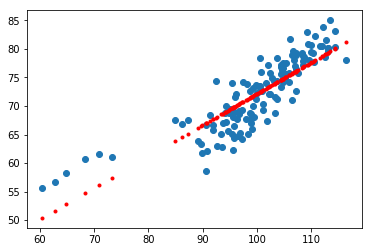

In [653]:
# ege-tge
ege_tge, error, score = create_model(df=merged, x_indices=[0], y_index=6)

print_model_info(ege_tge, error, score)

plot_model(df=merged, model=ege_tge, x_indices=[0], y_index=6)


### Tüketici Fiyat Endeksi ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 77.91299016269645
Coefficients: 
 [-0.02716897]
Mean squared error:  38.3982128280248
Variance score:  -0.044595385338782434


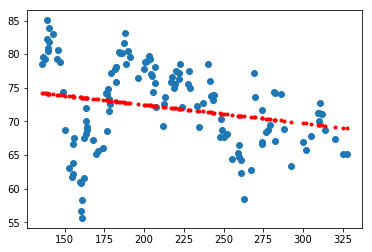

In [654]:
# tufe-tge
tufe_tge, error, score = create_model(df=merged, x_indices=[3], y_index=6)

print_model_info(tufe_tge, error, score)

plot_model(df=merged, model=tufe_tge, x_indices=[3], y_index=6)


### İşsiz Sayısı ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 29.257804788746405
Coefficients: 
 [0.54903473]
Mean squared error:  10.91972861253731
Variance score:  0.6956860274202759


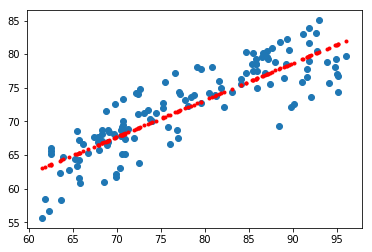

In [655]:
is_tge, error, score = create_model(df=merged, x_indices=[1], y_index=6)

print_model_info(is_tge, error, score)

plot_model(df=merged, model=is_tge, x_indices=[1], y_index=6)

### Toplam İstihdam ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 35.04992431923776
Coefficients: 
 [0.34557001]
Mean squared error:  28.112291003559307
Variance score:  0.1540026976948014


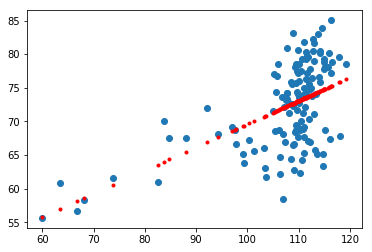

In [656]:
ti_tge, error, score = create_model(df=merged, x_indices=[2], y_index=6)

print_model_info(ti_tge, error, score)

plot_model(df=merged, model=ti_tge, x_indices=[2], y_index=6)

### OIS ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 72.63892604331724
Coefficients: 
 [-0.51067954]
Mean squared error:  42.851478680860836
Variance score:  -0.15739515564498657


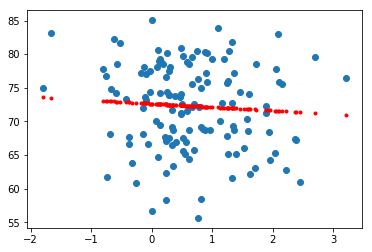

In [657]:
ois_tge, error, score = create_model(df=merged, x_indices=[5], y_index=6)

print_model_info(ois_tge, error, score)

plot_model(df=merged, model=ois_tge, x_indices=[5], y_index=6)

### Üretici Fiyat Endeksi ve Tüketici Güven Endeksi arasındaki ilişki


Intercept: 
 72.05297458885327
Coefficients: 
 [0.05509493]
Mean squared error:  43.26127121179725
Variance score:  -0.48503632363603427


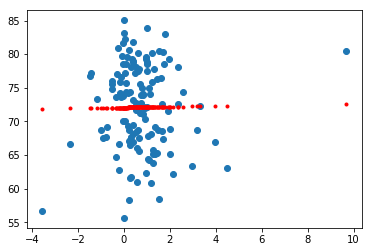

In [658]:
ois_tge, error, score = create_model(df=merged, x_indices=[4], y_index=6)

print_model_info(ois_tge, error, score)

plot_model(df=merged, model=ois_tge, x_indices=[4], y_index=6)

# 10-Fold Cross Validation (with function)

In [659]:
all_model, error, score = create_model(df=merged, x_indices=[0,1,2,3,4,5], y_index=6)

print_model_info(all_model, error, score)


Intercept: 
 18.3047906979952
Coefficients: 
 [ 0.40385805  0.28225482 -0.06127671 -0.0077168  -0.17092625 -0.21813231]
Mean squared error:  5.08919837222845
Variance score:  0.8511511439766751
